In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv("/Users/francis/Desktop/Github/elon-musk-sentiment-stock/data/musk_tweets_with_tsla_return.csv")
df = df.dropna(subset=["pct_change_next_day"])
print(df.columns)

Index(['orig_tweet_id', 'orig_tweet_created_at', 'orig_tweet_text',
       'orig_tweet_url', 'orig_tweet_twitter_url', 'orig_tweet_username',
       'orig_tweet_retweet_count', 'orig_tweet_reply_count',
       'orig_tweet_like_count', 'orig_tweet_quote_count',
       'orig_tweet_view_count', 'orig_tweet_bookmark_count', 'musk_tweet_id',
       'musk_quote_tweet', 'musk_quote_retweet_count',
       'musk_quote_reply_count', 'musk_quote_like_count',
       'musk_quote_quote_count', 'musk_quote_view_count',
       'musk_quote_bookmark_count', 'musk_quote_created_at', 'vader_compund',
       'vader_label', 'vader_compound', 'tweet_date', 'musk_quote_date',
       'Date_', 'Close_TSLA', 'next_trading_day', 'next_day_close',
       'pct_change_next_day'],
      dtype='object')


In [7]:
sentiment_group = df.groupby("vader_label")["pct_change_next_day"].agg(["mean", "count", "std"])
print(sentiment_group)

                 mean  count       std
vader_label                           
negative     0.000075   1087  0.044785
neutral     -0.000699   1812  0.042482
positive     0.000056   2315  0.043662


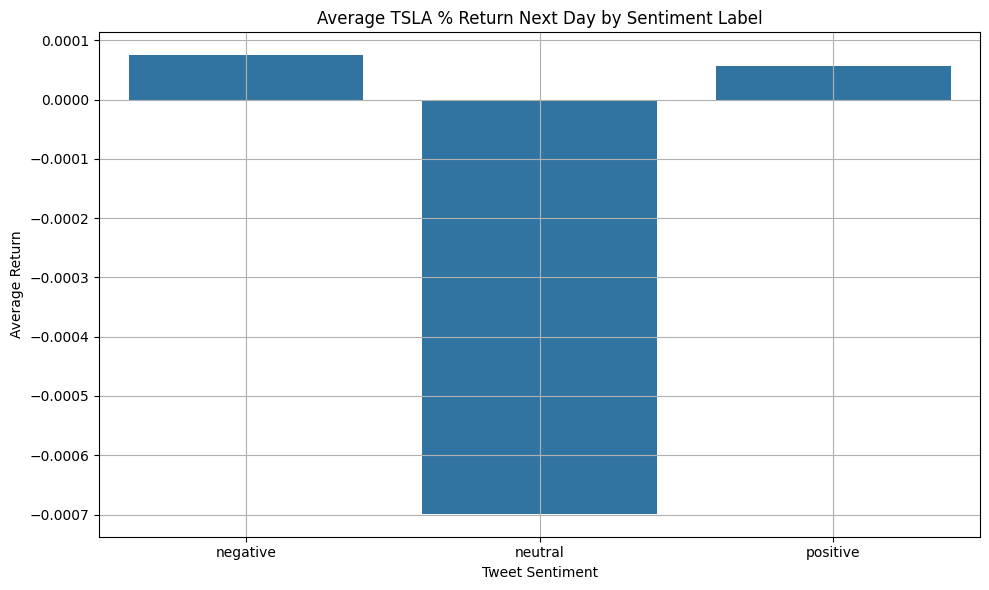

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='vader_label', y='mean', data=sentiment_group)
plt.title("Average TSLA % Return Next Day by Sentiment Label")
plt.ylabel("Average Return")
plt.xlabel("Tweet Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()

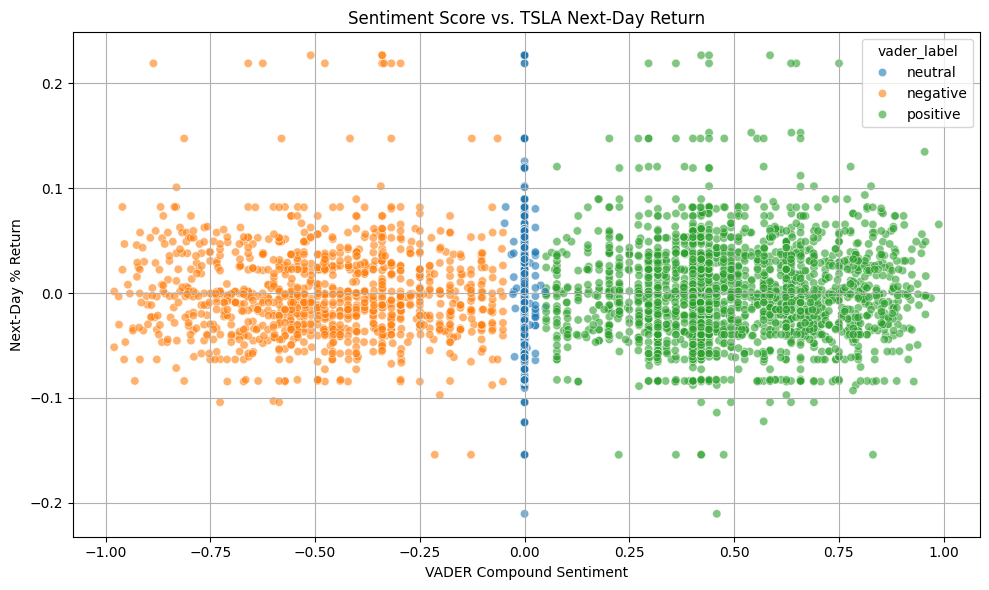

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vader_compound', y='pct_change_next_day', hue='vader_label', alpha=0.6)
plt.title("Sentiment Score vs. TSLA Next-Day Return")
plt.xlabel("VADER Compound Sentiment")
plt.ylabel("Next-Day % Return")
plt.grid(True)
plt.tight_layout()
plt.show()

(4698, 31)


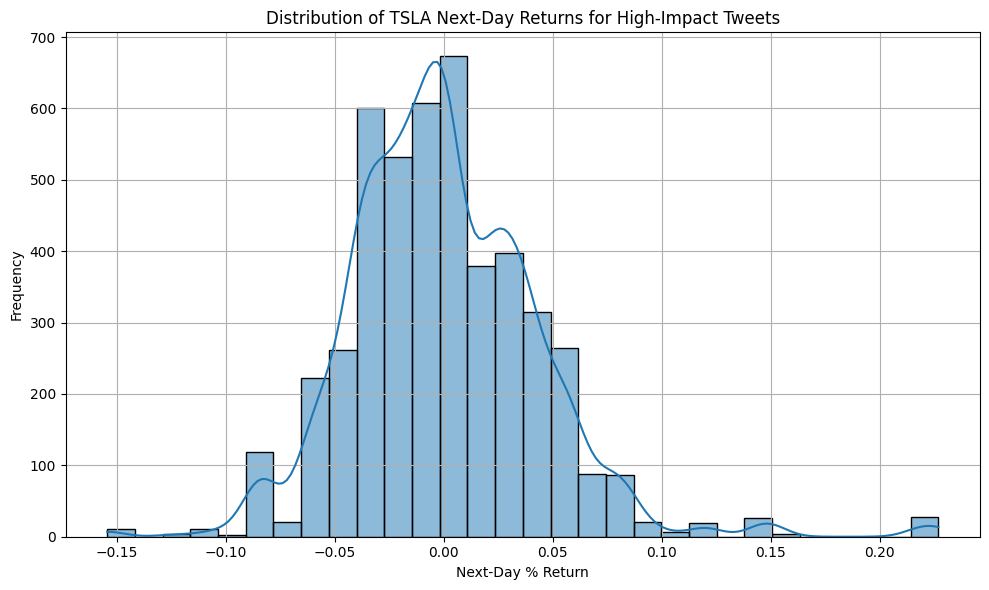

In [14]:
high_impact_tweets = df[df["musk_quote_view_count"] > 5000000]
print(high_impact_tweets.shape)

plt.figure(figsize=(10, 6))
sns.histplot(high_impact_tweets, x='pct_change_next_day', bins=30, kde=True)
plt.title("Distribution of TSLA Next-Day Returns for High-Impact Tweets")
plt.xlabel("Next-Day % Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

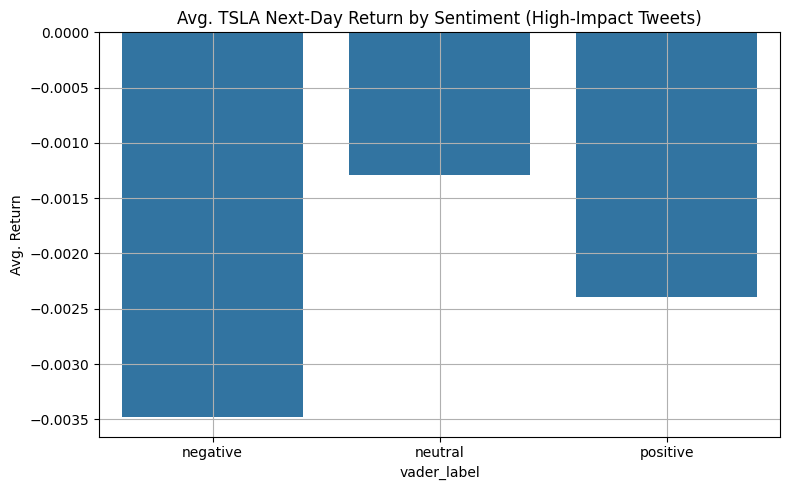

In [ ]:
summary = high_impact_tweets.groupby('vader_label')['pct_change_next_day'].agg(['mean', 'count', 'std']).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=summary, x='vader_label', y='mean')
plt.title("Avg. TSLA Next-Day Return by Sentiment (High-Impact Tweets)")
plt.ylabel("Avg. Return")
plt.grid(True)
plt.tight_layout()
plt.show()


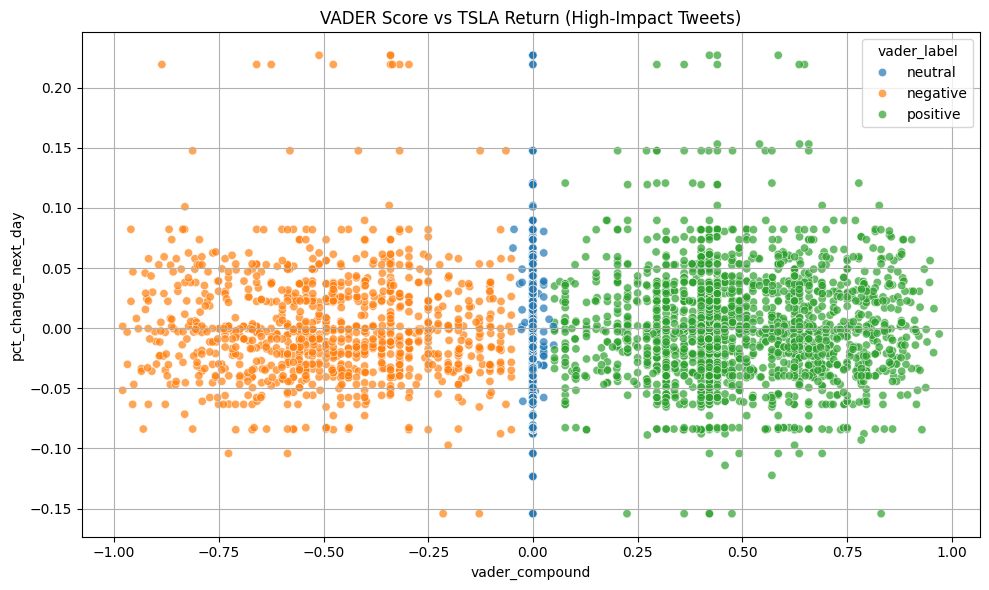

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=high_impact_tweets,
    x='vader_compound',
    y='pct_change_next_day',
    hue='vader_label',
    alpha=0.7
)
plt.title("VADER Score vs TSLA Return (High-Impact Tweets)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
print(high_impact_tweets["vader_label"].value_counts())
print(high_impact_tweets.groupby("vader_label")["pct_change_next_day"].median())

vader_label
positive    2059
neutral     1616
negative    1023
Name: count, dtype: int64
vader_label
negative   -0.003482
neutral    -0.001294
positive   -0.002390
Name: pct_change_next_day, dtype: float64


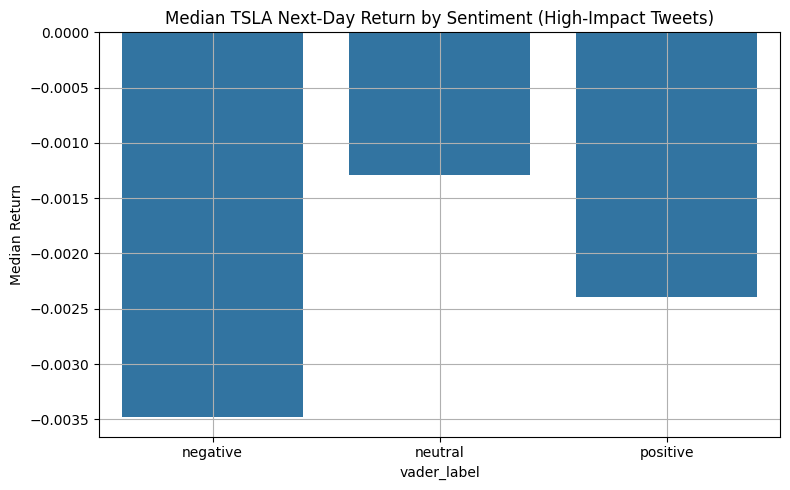

In [25]:
summary_with_median = high_impact_tweets.groupby('vader_label')['pct_change_next_day'].agg(["median"]).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=summary_with_median, x='vader_label', y='median')
plt.title("Median TSLA Next-Day Return by Sentiment (High-Impact Tweets)")
plt.ylabel("Median Return")
plt.grid(True)
plt.tight_layout()
plt.show()
